1. Basic time series handling using pandas
2. Convert to datetime, set datetime index
3. Perform resampling and slicing
Objective:
1. Analyze electricity consumption patterns over time using datetime-aware methods. Focus on resampling (daily, weekly, monthly), and slicing time ranges.
Skills Practiced:
1. pd.to_datetime() conversion
2. Setting datetime index
3. Time-based slicing (df.loc['2020-01'], etc.)
4. Resampling (resample('M'), resample('W'))
5. Plotting simple trends
Dataset: Household Electric Power Consumption on Kaggle ()
File: household_power_consumption.txt (CSV format, includes date and time columns)

In [47]:
import pandas as pd
import numpy as np

In [72]:
# ro seperate used ;  , sep = ";", low_memory=False)
path =pd.read_csv( r"C:\Users\bbuser\Desktop\JUPYTER MAIN FOLDER\household_power_consumption.txt\household_power_consumption.txt", sep = ";", low_memory=False)
df.head(10)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


In [49]:
df.columns

Index(['Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3'], dtype='object')

In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 1 columns):
 #   Column                                                                                                                     Dtype 
---  ------                                                                                                                     ----- 
 0   Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3  object
dtypes: object(1)
memory usage: 15.8+ MB


In [51]:
df.describe()

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
count,2075259
unique,2075259
top,26/11/2010;21:02:00;0.932;0.000;239.550;3.800;...
freq,1


## 1. Setting datetime index

In [116]:
# Merge the date and time strings into a unified column
datetime_strings = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

# Parse the merged strings into proper datetime objects
timestamps = pd.to_datetime(datetime_strings, dayfirst=True, format='%d/%m/%Y %H:%M:%S')

# Replace the index with the newly created timestamps
df.index = timestamps

# Preview the top 10 entries
df.iloc[:10]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power_cleaned
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,4.216
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,5.360
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,5.374
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,5.388
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,3.666
2006-12-16 17:29:00,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0,3.520
2006-12-16 17:30:00,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0,3.702
2006-12-16 17:31:00,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0,3.700
2006-12-16 17:32:00,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0,3.668
2006-12-16 17:33:00,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0,3.662


## 2. Time-based slicing (df.loc['2020-01'], etc.)

In [105]:
# Extract all entries from the year 2007
records_in_2007 = df[df.index.strftime('%Y') == '2007']
print(f"Total entries for 2007: {records_in_2007.shape[0]}")

# Filter for data in January 2007
jan_2007_data = df[(df.index.month == 1) & (df.index.year == 2007)]
print(f"Entries recorded in January 2007: {jan_2007_data.shape[0]}")

# Select data between January 1 and January 7, 2007
week_slice = df.loc['2007-01-01':'2007-01-07']
print(f"Entries from the first week of 2007: {week_slice.shape[0]}")

# Filter rows that fall between 6 AM and 12 PM across all days
morning_window_data = df.between_time('06:00', '12:00')
print(f"Records between 6:00 and 12:00: {morning_window_data.shape[0]}")


Total entries for 2007: 525600
Entries recorded in January 2007: 44640
Entries from the first week of 2007: 10080
Records between 6:00 and 12:00: 520201


## Resampling 

In [106]:
# Create a cleaned version of the power column with numeric values
df['Global_active_power_cleaned'] = pd.to_numeric(df['Global_active_power'], errors='coerce')


In [107]:
# Calculate average power usage per day
daily_mean_power = df.resample('D')['Global_active_power'].mean()

# Transform the Series into a structured DataFrame
daily_power_df = daily_mean_power.to_frame(name='Daily_Average_Power').reset_index()

# Display the first 10 records
daily_power_df.iloc[:10]


,index,Daily_Average_Power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658
5,2006-12-21,1.193758
6,2006-12-22,1.625929
7,2006-12-23,3.314851
8,2006-12-24,1.770842
9,2006-12-25,1.904944


In [109]:
# Calculate average power consumption per month (month end frequency)
monthly_mean = df.resample('ME')['Global_active_power'].mean()

# Convert the monthly averages to a DataFrame and rename columns
monthly_power_df = monthly_mean.to_frame(name='Monthly_Average_Power').reset_index()

# Display the first 10 rows
monthly_power_df.iloc[:10]


,index,Monthly_Average_Power
0,2006-12-31,1.901295
1,2007-01-31,1.546034
2,2007-02-28,1.401084
3,2007-03-31,1.318627
4,2007-04-30,0.891189
5,2007-05-31,0.985862
6,2007-06-30,0.826814
7,2007-07-31,0.667367
8,2007-08-31,0.764186
9,2007-09-30,0.969318


In [95]:
# Monthly Average
monthly_avg = df['Global_active_power'].resample('ME').mean()
monthly_avg_df = daily_avg.reset_index()
monthly_avg_df.columns = ['Date', 'Monthly_Average_Power']
monthly_avg_df.head(10)

,Date,Monthly_Average_Power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658
5,2006-12-21,1.193758
6,2006-12-22,1.625929
7,2006-12-23,3.314851
8,2006-12-24,1.770842
9,2006-12-25,1.904944


## plot

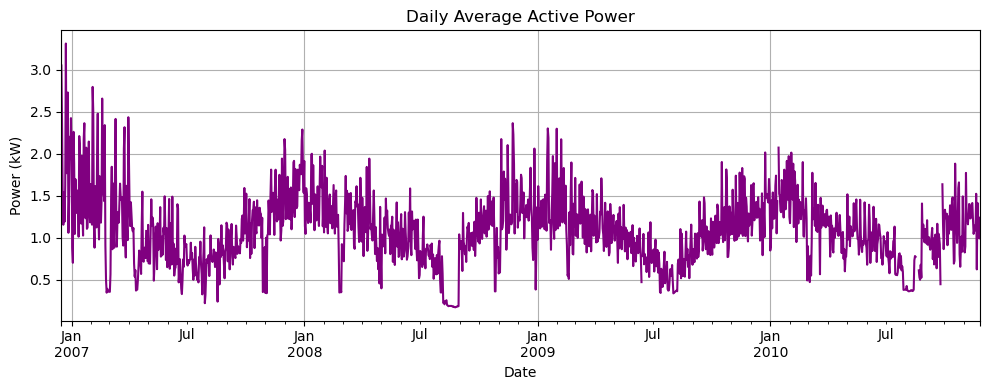

In [113]:
# Plot daily average active power
plt.figure(figsize=(10, 4))
daily_mean_power.plot(color='purple', title='Daily Average Active Power')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()

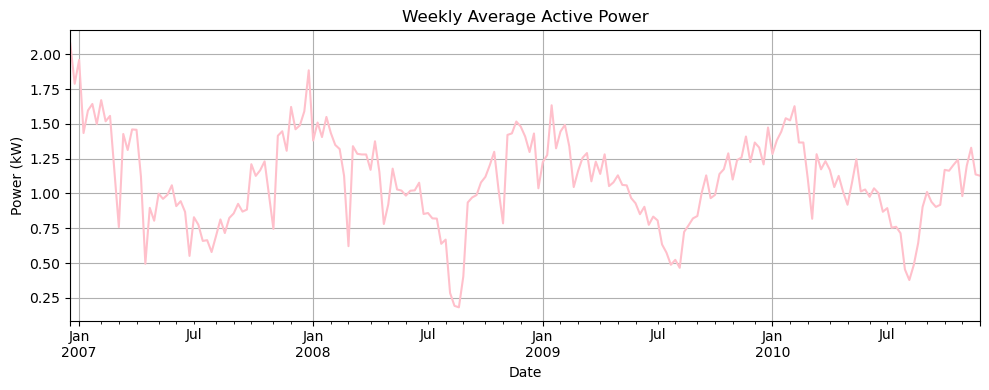

In [114]:
# Plot weekly average active power
plt.figure(figsize=(10, 4))
weekly_mean.plot(color='pink', title='Weekly Average Active Power')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()

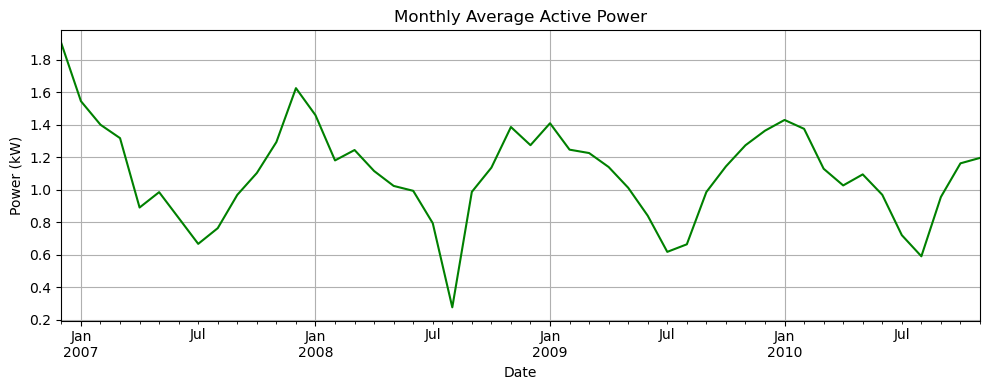

In [115]:
# Plot monthly average active power
plt.figure(figsize=(10, 4))
monthly_mean.plot(color='green', title='Monthly Average Active Power')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.tight_layout()
plt.show()